# Spotify Project

## Connect to Spotify

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot
import pandas as pd 
import numpy as np
import json
import config
import pickle
import random

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.cl_id, client_secret= config.cl_se))

In [4]:
# Search for a playlist

playlist = sp.user_playlist_tracks("spotify","1G8IpkZKobrIlXcVPoSIuf")
playlist

{'href': 'https://api.spotify.com/v1/playlists/1G8IpkZKobrIlXcVPoSIuf/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2020-11-29T15:02:07Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/acclaimedmusic'},
    'href': 'https://api.spotify.com/v1/users/acclaimedmusic',
    'id': 'acclaimedmusic',
    'type': 'user',
    'uri': 'spotify:user:acclaimedmusic'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
       'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
       'id': '74ASZWbe4lXaubB36ztrGX',
       'name': 'Bob Dylan',
       'type': 'artist',
       'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
     

In [5]:
print(list(playlist.keys()))
print("Total number of songs in the playlist: ",playlist["total"])

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
Total number of songs in the playlist:  10000


# Retrieve the audio features of each song in the playlist

my_dict = sp.audio_features(playlist["items"][0]["track"]["uri"])[0]
my_dict_new = { key: [my_dict[key]] for key in list(my_dict.keys())}
print(my_dict_new)

In [6]:
# Function to extract MetaData from a playlist thats longer than 100 songs
def get_playlist_tracks_more_than_100_songs(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results["items"]
    while results["next"]:
        results = sp.next(results)
        tracks.extend(results["items"])
    results = tracks
    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []
    for i in range(len(results)):
        print(i) # Counter
        if i == 0:
            playlist_tracks_id = results[i]["track"]["id"]
            playlist_tracks_titles = results[i]["track"]["name"]
            playlist_tracks_first_release_date = results[i]["track"]["album"]["release_date"]
            playlist_tracks_popularity = results[i]["track"]["popularity"]
            artist_list = []
            for artist in results[i]["track"]["artists"]:
                artist_list= artist["name"]
            playlist_tracks_artists = artist_list
            features = sp.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df["title"] = playlist_tracks_titles
            features_df["all_artists"] = playlist_tracks_artists
            features_df["popularity"] = playlist_tracks_popularity
            features_df["release_date"] = playlist_tracks_first_release_date
            features_df = features_df[["id", "title", "all_artists", "popularity", "release_date",
                                       "danceability", "energy", "key", "loudness",
                                       "mode", "acousticness", "instrumentalness",
                                       "liveness", "valence", "tempo",
                                       "duration_ms", "time_signature"]]
            continue
        else:
            try:
                playlist_tracks_id = results[i]["track"]["id"]
                playlist_tracks_titles = results[i]["track"]["name"]
                playlist_tracks_first_release_date = results[i]["track"]["album"]["release_date"]
                playlist_tracks_popularity = results[i]["track"]["popularity"]
                artist_list = []
                for artist in results[i]["track"]["artists"]:
                    artist_list= artist["name"]
                playlist_tracks_artists = artist_list
                features = sp.audio_features(playlist_tracks_id)
                new_row = {"id":[playlist_tracks_id],
               "title":[playlist_tracks_titles],
               "all_artists":[playlist_tracks_artists],
               "popularity":[playlist_tracks_popularity],
               "release_date":[playlist_tracks_first_release_date],
               "danceability":[features[0]["danceability"]],
               "energy":[features[0]["energy"]],
               "key":[features[0]["key"]],
               "loudness":[features[0]["loudness"]],
               "mode":[features[0]["mode"]],
               "acousticness":[features[0]["acousticness"]],
               "instrumentalness":[features[0]["instrumentalness"]],
               "liveness":[features[0]["liveness"]],
               "valence":[features[0]["valence"]],
               "tempo":[features[0]["tempo"]],
               "duration_ms":[features[0]["duration_ms"]],
               "time_signature":[features[0]["time_signature"]]
               }
                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
    return features_df


df=get_playlist_tracks_more_than_100_songs("spotify","1G8IpkZKobrIlXcVPoSIuf")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Create a Data Frame

In [7]:
df

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3AhXZa8sUQht0UEdBJgpGc,Like a Rolling Stone,Bob Dylan,72,1965-08-30,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.557,95.263,369600,4
1,3oTlkzk1OtrhH8wBAduVEi,Smells Like Teen Spirit,Nirvana,0,1991-09-26,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.767,116.835,300977,4
2,3ZFBeIyP41HhnALjxWy1pR,A Day In The Life - Remastered,The Beatles,0,1967-06-01,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.175,163.219,337413,4
3,5Qt4Cc66g24QWwGP3YYV9y,Good Vibrations (Mono),The Beach Boys,22,1967-09-18,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.331,133.574,219147,4
4,7MH2ZclofPlTrZOkPzZKhK,Johnny B Goode,Chuck Berry,0,1959,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.968,166.429,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,2QSD3K3b3BJ8DPhGhQfDPW,Into The Valley,Skids,47,1979-01-01,0.332,0.707,7,-12.698,1,0.000012,0.006120,0.1100,0.652,144.815,199467,4
9943,49XnDVsYOHgV4gFZeCojKj,Tonight's Da Night,Redman,0,1992-01-01,0.464,0.749,6,-8.564,1,0.224000,0.000046,0.3510,0.879,181.121,201800,4
9944,5Y9IIH8Xmo1nuk0gfFjc4Q,Figure 8,FKA twigs,0,2015-08-13,0.694,0.710,2,-9.793,1,0.527000,0.001350,0.0697,0.415,119.964,183040,4
9945,0ya0JYEFoXNviB8RMeHDtW,Like An Angel,The Mighty Lemon Drops,0,1997,0.332,0.800,1,-9.746,1,0.000368,0.001600,0.0850,0.832,149.240,222160,4


## Save the data in a pickle file

In [8]:
import pickle

with open('my_10k_songs.pickle', 'wb') as output:
    pickle.dump(df, output)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9947 entries, 0 to 9946
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9947 non-null   object 
 1   title             9947 non-null   object 
 2   all_artists       9947 non-null   object 
 3   popularity        9947 non-null   int64  
 4   release_date      9947 non-null   object 
 5   danceability      9947 non-null   float64
 6   energy            9947 non-null   float64
 7   key               9947 non-null   int64  
 8   loudness          9947 non-null   float64
 9   mode              9947 non-null   int64  
 10  acousticness      9947 non-null   float64
 11  instrumentalness  9947 non-null   float64
 12  liveness          9947 non-null   float64
 13  valence           9947 non-null   float64
 14  tempo             9947 non-null   float64
 15  duration_ms       9947 non-null   int64  
 16  time_signature    9947 non-null   int64  


In [10]:
round(df.describe(),1)

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9947.0,9947.0,9947.0,9947.0,9947.0,9947.0,9947.0,9947.0,9947.0,9947.0,9947.0,9947.0,9947.0
mean,21.4,0.6,0.6,5.3,-9.2,0.7,0.3,0.1,0.2,0.6,121.3,251596.5,3.9
std,25.9,0.2,0.2,3.5,3.9,0.5,0.3,0.2,0.2,0.2,28.0,118905.5,0.3
min,0.0,0.1,0.0,0.0,-60.0,0.0,0.0,0.0,0.0,0.0,37.1,47227.0,1.0
25%,0.0,0.5,0.4,2.0,-11.6,0.0,0.0,0.0,0.1,0.4,100.6,184533.0,4.0
50%,0.0,0.6,0.7,5.0,-8.7,1.0,0.2,0.0,0.1,0.6,120.0,228218.0,4.0
75%,45.0,0.7,0.8,9.0,-6.3,1.0,0.6,0.0,0.2,0.8,137.3,284973.5,4.0
max,86.0,1.0,1.0,11.0,1.3,1.0,1.0,1.0,1.0,1.0,217.6,2516987.0,5.0


In [11]:
df_numeric = df._get_numeric_data()
df_numeric.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

# Clustering

## Obtain numeric values

In [12]:
X = df_numeric
X

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,72,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.557,95.263,369600,4
1,0,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.767,116.835,300977,4
2,0,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.175,163.219,337413,4
3,22,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.331,133.574,219147,4
4,0,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.968,166.429,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,47,0.332,0.707,7,-12.698,1,0.000012,0.006120,0.1100,0.652,144.815,199467,4
9943,0,0.464,0.749,6,-8.564,1,0.224000,0.000046,0.3510,0.879,181.121,201800,4
9944,0,0.694,0.710,2,-9.793,1,0.527000,0.001350,0.0697,0.415,119.964,183040,4
9945,0,0.332,0.800,1,-9.746,1,0.000368,0.001600,0.0850,0.832,149.240,222160,4


## Scaled data

In [13]:
# Scaling the data, some variables such a "duration_ms" or "tempo" have a very different scale than other variables

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,72,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.557,95.263,369600,4
1,0,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.767,116.835,300977,4
2,0,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.175,163.219,337413,4
3,22,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.331,133.574,219147,4
4,0,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.968,166.429,160893,4


,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.956618,-0.501129,0.446067,-1.493842,0.611883,0.642749,1.305306,-0.442770,-0.003683,-0.080959,-0.931841,0.992464,0.218517
1,-0.827161,-0.483132,1.053684,-1.211551,0.045146,0.642749,-0.945485,-0.375210,-0.335158,0.772147,-0.160228,0.415313,0.218517
2,-0.827161,-1.208998,-0.683589,-0.364677,-1.284924,-1.555816,-0.052581,-0.442328,4.760463,-1.632799,1.498892,0.721756,0.218517
3,0.023438,-1.005036,-0.871865,-1.211551,-0.448806,0.642749,-0.692420,-0.442664,-0.652984,-0.999064,0.438513,-0.272915,0.218517
4,-0.827161,-0.285169,0.595832,1.329070,-0.427307,0.642749,1.317622,-0.442512,0.828255,1.588691,1.613711,-0.762858,0.218517


In [14]:
#X_scaled_df.describe()

In [15]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=10, random_state=42)

In [16]:
len(kmeans.labels_)

9947

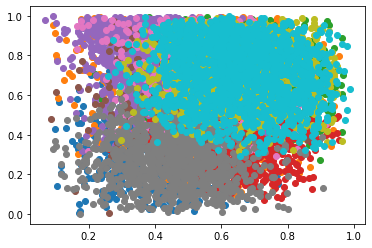

In [17]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [18]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     578
1     818
2    1369
3    1016
4    1232
5     149
6     527
7    1116
8    1475
9    1667
dtype: int64

In [19]:
X["cluster"] = clusters
X.head()

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,72,0.482,0.721,0,-6.839,1,0.731000,0.000000,0.1890,0.557,95.263,369600,4,2
1,0,0.485,0.863,1,-9.027,1,0.000012,0.016200,0.1380,0.767,116.835,300977,4,8
2,0,0.364,0.457,4,-14.162,0,0.290000,0.000106,0.9220,0.175,163.219,337413,4,6
3,22,0.398,0.413,1,-10.934,1,0.082200,0.000025,0.0891,0.331,133.574,219147,4,4
4,0,0.518,0.756,10,-10.851,1,0.735000,0.000062,0.3170,0.968,166.429,160893,4,3


In [20]:
X[X['cluster'] == 2].sample()

,popularity,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
8514,38,0.678,0.713,8,-10.031,1,0.399,0.000007,0.249,0.941,151.609,234293,4,2


In [21]:
kmeans.inertia_

74433.85904542009

In [22]:
kmeans2 = KMeans(n_clusters=10,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=42)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

74530.97241872102


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

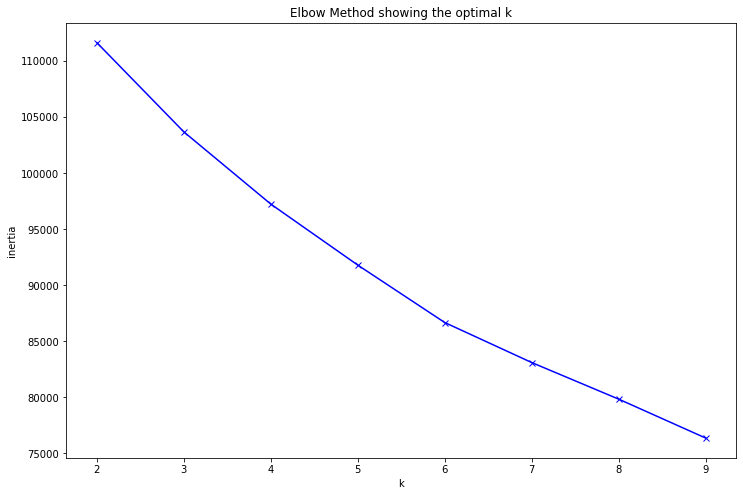

In [23]:
K = range(2, 10)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans_3 = KMeans(n_clusters=k,
                    random_state=42)
    kmeans_3.fit(X_scaled_df)
    inertia.append(kmeans_3.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

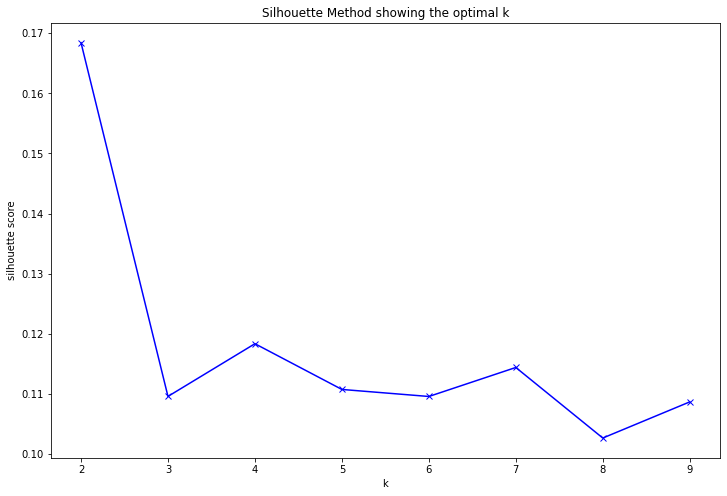

In [24]:
K = range(2, 10)
silhouette = []

for k in K:
    kmeans_3 = KMeans(n_clusters=k,
                    random_state=42)
    kmeans_3.fit(X_scaled_df)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans_3.predict(X_scaled_df)))


plt.figure(figsize=(12,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

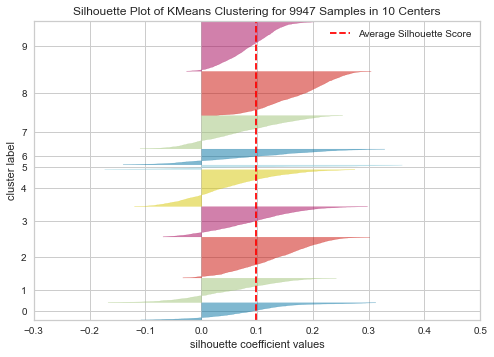

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 9947 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Song recommendation

+ get songname(input)
+ get feature information from the song via id or uri
+ assign the features to a variable, create a dataframe and get numerics
+ transform
+ compare the transformed variable with the clustering
+ recommend a random song from the cluster

In [26]:
# Song recommendation

song = input("Input a song you like").lower()

def get_song_recommendation():
    if song in df["title"].values:
        print("Thats a hot song")
        random_song = random.choice(df["title"].values)
        return print("You might like", random_song, "as you next song")
    else:   
        return print(" ",song," ","is not a hot song. How about this song")
    
    
get_song_recommendation()

  easy on me   is not a hot song. How about this song


In [27]:
song_search = sp.search(q=song, limit=1) 
#song_search

In [28]:
df_features = sp.audio_features(song_search["tracks"]["items"][0]["uri"])[0]
#df_features

In [29]:
my_dict = sp.audio_features(song_search["tracks"]["items"][0]["uri"])[0] # you can provide a list of uri's

#print(my_dict)
my_dict_new = { key: [my_dict[key]] for key in list(my_dict.keys()) }
#my_dict_new['name'] = [song["tracks"]["items"][0]['name']]
#print(my_dict_new)

df_song = pd.DataFrame(my_dict_new)
#df_song

In [30]:
X_song = df_song._get_numeric_data()
#X_song

In [31]:
X_song_scaled = scaler.transform(X_song)
#X_song_scaled

In [32]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 10,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [33]:
input_song_cluster = kmeans.predict(X_song_scaled)[0]
input_song_cluster

4

In [34]:
# add cluster column to the original df

df["cluster"] = clusters
df.head(1)

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,3AhXZa8sUQht0UEdBJgpGc,Like a Rolling Stone,Bob Dylan,72,1965-08-30,0.482,0.721,0,-6.839,1,0.731,0.0,0.189,0.557,95.263,369600,4,2


In [35]:
recommendation = df[df['cluster'] == input_song_cluster].sample()
recommendation[["title","cluster"]]
print("You might also like this song",recommendation["title"])


You might also like this song 3435    It's A Shame
Name: title, dtype: object


In [36]:
input_id = recommendation["id"]
input_id

3435    1BmNPbw8QYr4XKOYAGA568
Name: id, dtype: object

In [44]:
from IPython.display import IFrame
track_id = "1BmNPbw8QYr4XKOYAGA568"
IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )